In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic ="/content/drive/MyDrive/Titnaic Data/train.csv"


In [ ]:
titanic_data = pd.read_csv(titanic)
print(" # of passengers"+str(len(titanic_data.index)))

 # of passengers891


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data.drop("Cabin", axis=1,inplace=True)


In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_data.dropna(inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [ ]:
titanic_data.drop(['PassengerId','Name','Sex','Embarked','Ticket','Pclass'],axis=1,inplace=True)

In [ ]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
y=titanic_data['Survived']
X=titanic_data.drop(['Survived'],axis=1)


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


## Scale the Data

In [ ]:
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(X)

## Split Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

## Train

### Train/ Build Model Logistic Reg


In [ ]:
#Importing the simple LogisticRegression
from sklearn.linear_model import LogisticRegression
#Importing the LogisticRegression
reg = LogisticRegression()

In [ ]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Train Decission Tree Classifier

In [ ]:
# Decision Tree
# from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train) # Train Model

y_pred = decision_tree.predict(X_test)

y_pred_prob = decision_tree.predict_proba(X_train)


In [ ]:
y_pred[:5]

array([1, 1, 0, 1, 0])

In [ ]:
y_pred_prob[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
from sklearn import tree
text_representation = tree.export_text(decision_tree,feature_names=list(X.columns))
print(text_representation)

|--- male <= -0.28
|   |--- 3 <= 0.00
|   |   |--- Age <= 1.85
|   |   |   |--- Fare <= -0.10
|   |   |   |   |--- Fare <= -0.12
|   |   |   |   |   |--- Fare <= -0.24
|   |   |   |   |   |   |--- Age <= -0.15
|   |   |   |   |   |   |   |--- Fare <= -0.27
|   |   |   |   |   |   |   |   |--- Fare <= -0.40
|   |   |   |   |   |   |   |   |   |--- Age <= -0.29
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  -0.29
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  -0.40
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Fare >  -0.27
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  -0.15
|   |   |   |   |   |   |   |--- Age <= 0.51
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  0.51
|   |   |   |   |   |   |   |   |--- Age <= 0.65
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |

In [ ]:
list(X.columns)

['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3]

In [ ]:

# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(decision_tree, 
#                    filled=True,
#                    feature_names=list(X.columns), 
#                    class_names=['yes',"no"])

In [ ]:
fe_imp =pd.DataFrame(decision_tree.feature_importances_,columns=['Feature_importance'])
fe_imp["feature_names"] = X.columns
fe_imp.sort_values(by="Feature_importance",ascending=False)

,Feature_importance,feature_names
4,0.315285,male
0,0.251611,Age
3,0.247528,Fare
8,0.119336,3
1,0.025401,SibSp
7,0.020150,2
6,0.011422,S
2,0.009267,Parch
5,0.000000,Q


## Get Predictions

In [ ]:
y_pred_train = reg.predict_proba(X_train) # Get probability
# y_pred_train[:,1] # Take only second column (probability of for 1)
y_pred_train_class = reg.predict(X_train) # Get class


In [ ]:
y_pred_test = reg.predict_proba(X_test)
y_pred_test_class = reg.predict(X_test)

In [ ]:
y_pred_test[:,1][:5] # Takin only first 5 records int the second column

array([0.97155429, 0.88801019, 0.29707783, 0.95855884, 0.23976177])

## Confusion Matrix


In [ ]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train_class) # for Train data


array([[260,  42],
       [ 50, 146]])

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred_train_class).ravel()
TN, FP, FN, TP
Actual_Postives= 146
Actual_Negatives= 42

## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train_class, normalize=True)

0.8152610441767069

In [ ]:
accuracy_score(y_train, y_pred_train_class, normalize=True)

0.8152610441767069

## AUC Score

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
# ROC curve on test data
tpr, fpr, threshold =roc_curve(y_true = y_test, y_score = y_pred_test[:,1])

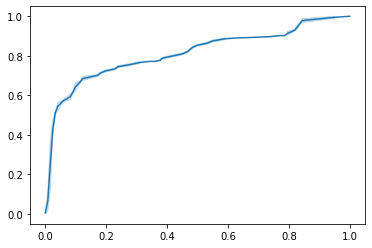

In [ ]:
import seaborn as sns
sns.lineplot(y=fpr,x=tpr)

In [ ]:
roc_auc_score(y_true = y_test, y_score = y_pred_test[:,1]) # AUC Score

0.8126336421952958

## Assignment : Derive All Below
True positive Rate:	TP/Actual Postives

False Negative rate:	FN/actual Postives

False Positive rate:	FP/ Actual Negatives

True Negative Rate:	TN/Actual Negatives

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)


In [ ]:
import numpy as np

def perf_metrics_2X2(y_train,y_pred_train_class):
  
    True_positive_Rate  = TP /Actual_Postives 
    False_Negative_Rate  = FN / Actual_Postives
    False_Positive_Rate = FP/ Actual_Negatives
    True_Negative_Rate = TN/ Actual_Negatives

    return True_positive_Rate, False_Negative_Rate, False_Positive_Rate, True_Negative_Rate


In [ ]:
perf_metrics_2X2(y_train,y_pred_train_class)

(1.0, 0.3424657534246575, 1.0, 6.190476190476191)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])